In [1]:
import sys
sys.path.append('/cndd2/fangming/software/FIt-SNE')

In [2]:
from fast_tsne import fast_tsne

In [3]:
from tree_sne import TreeSNE
from display_tree import display_tree_mnist
import numpy as np
import scipy.io
from sklearn.metrics import normalized_mutual_info_score
from display_tree import display_tree_categorical
import pandas as pd
from sklearn.decomposition import PCA
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set(color_codes=True)
from sklearn.metrics.cluster import adjusted_rand_score

## Clean up data for tree_sne

In [4]:
DATA_DIR = '/cndd/fangming/CEMBA/data/MOp_all/organized_neurons_v2'
mod = 'snmcseq_gene'
meta_f = os.path.join(DATA_DIR, '{0}_metadata.tsv')
hvftrs_f = os.path.join(DATA_DIR, '{0}_hvfeatures.{1}')

In [5]:
metadata = pd.read_csv(meta_f.format(mod), sep ='\t')
metadata = metadata.set_index('CellID', drop=False)
data = pd.read_csv(hvftrs_f.format(mod, 'tsv'), sep='\t')
data = data.set_index('Unnamed: 0').T
metadata = metadata.loc[data.index]

In [6]:
data.index.names = ['CellID']

In [7]:
data

Unnamed: 0,Eloc,Tmem70,Tfap2b,Actr1b,Coa5,Cnot11,Bzw1,Gm7609,Gm7281,Gm2427,...,4930445N18Rik,Fam69c,Ovol1,Tle4,Dmrt3,Ifit1bl1,Ifit1bl2,Pitx3,Pnliprp1,E330013P04Rik
CellID,,,,,,,,,,,,,,,,,,,,,
171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_1_CEMBA171206_3C_3_A10_AD001_indexed,0.693946,0.000000,0.079122,0.239778,0.232684,0.000000,0.000000,2.397783,0.000000,0.257017,...,2.383251,1.099108,1.504183,1.921458,1.875811,1.191625,1.443069,1.670976,1.310788,0.763566
171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_1_CEMBA171206_3C_3_A10_AD002_indexed,0.172457,0.366176,0.384064,0.131033,0.320130,0.340520,0.000000,0.190934,0.417669,0.520730,...,1.268251,1.356894,0.934644,3.151964,1.800522,1.028108,1.184746,1.686896,1.792921,1.909344
171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_1_CEMBA171206_3C_3_A10_AD004_indexed,1.702881,0.175589,0.300842,0.446796,0.000000,1.367465,0.567627,0.828006,0.448275,0.805828,...,1.893413,1.943904,0.543691,2.058091,1.869139,1.892717,1.735629,1.100643,1.507167,2.765809
171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_1_CEMBA171206_3C_3_A10_AD007_indexed,0.143270,0.178776,0.352444,0.260243,0.237679,1.142178,0.479982,0.435116,0.789053,0.432825,...,1.027961,1.969745,1.948740,2.149372,0.874860,0.941643,1.487488,1.841123,1.510473,2.064523
171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_1_CEMBA171206_3C_3_A10_AD008_indexed,0.514949,1.137387,0.684093,0.747772,1.077250,0.637556,0.656921,0.000000,0.347114,1.211906,...,0.551298,1.937834,1.974958,2.259692,1.073138,1.286363,1.097630,2.407844,1.543305,1.579563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CEMBA180104_4B_4_H9_AD006_indexed,0.658484,0.509393,0.299145,0.988932,0.000000,0.495373,0.000000,0.000000,0.747863,0.000000,...,0.851667,1.278845,2.571223,0.292299,2.322395,1.578821,1.809911,2.466808,2.114289,2.602201
180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CEMBA180104_4B_4_H9_AD007_indexed,0.134451,0.000000,0.143260,0.232098,0.000000,0.000000,0.000000,0.153872,0.421069,0.000000,...,1.658278,1.284912,3.462124,0.147534,2.694843,1.780521,2.245702,6.260280,2.546337,3.267623
180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CEMBA180104_4B_4_H9_AD008_indexed,0.000000,0.000000,0.000000,0.550408,0.000000,0.000000,0.448481,0.000000,0.209353,0.000000,...,2.013862,0.758708,2.065372,0.141858,7.007512,2.594782,1.409332,3.210715,2.655478,2.803005


In [8]:
metadata

,CellID,Category_Ecker,ClusterID_Ecker,ClusterLabel_Ecker,Genome_Coverage,Reads_Filtered,Reads_Mapped,Reads_Nonclonal,Reads_Total,Valid_Glia,...,mCH/CH,Estimated mCG/CG,Estimated mCH/CH,% Genome covered,region,replicate,ALLC_path,v2_id,major_clusters,sub_cluster
CellID,,,,,,,,,,,,,,,,,,,,,
171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_1_CEMBA171206_3C_3_A10_AD001_indexed,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_...,Neuron,9,L2/3,0.0492,1195574,1812485,1475086,2896392,0,...,0.02543,0.75774,0.01818,4.92,3C,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_0,L2-3,L2-3_4_LowQual
171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_1_CEMBA171206_3C_3_A10_AD002_indexed,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_...,Neuron,6,L5a,0.0558,1355517,2086717,1685218,3306366,0,...,0.03741,0.77695,0.02830,5.58,3C,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_1,L5a,L5a_1
171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_1_CEMBA171206_3C_3_A10_AD004_indexed,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_...,Neuron,11,L4,0.0665,1631274,2517605,2032935,3972894,0,...,0.02216,0.75080,0.01481,6.65,3C,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_2,L4,L4_2
171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_1_CEMBA171206_3C_3_A10_AD007_indexed,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_...,Neuron,19,L2/3,0.0602,1479211,2359076,1903348,3772120,0,...,0.02432,0.75336,0.01743,6.02,3C,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_3,L2-3,L2-3_1
171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_1_CEMBA171206_3C_3_A10_AD008_indexed,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_...,Neuron,11,L4,0.0528,1293662,2063268,1671265,3314196,0,...,0.02134,0.76515,0.01461,5.28,3C,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_4,L4,L4_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CEMBA180104_4B_4_H9_AD006_indexed,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CE...,Neuron,26,L6,0.0510,1211041,1727025,1456794,2732458,0,...,0.01852,0.77585,0.01364,5.10,4B,4B_M_180104,/gale/raidix/rdx-4/CEMBA_RS1/4B/CEMBA180104_4B...,4B_806,L6a,L6a_0
180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CEMBA180104_4B_4_H9_AD007_indexed,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CE...,Neuron,33,L6,0.0475,1128264,1619985,1366651,2454868,0,...,0.02407,0.79115,0.01910,4.75,4B,4B_M_180104,/gale/raidix/rdx-4/CEMBA_RS1/4B/CEMBA180104_4B...,4B_894,L6a,L6a_5
180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CEMBA180104_4B_4_H9_AD008_indexed,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CE...,Neuron,26,L6,0.0402,955952,1384698,1176697,2118838,0,...,0.01982,0.78281,0.01492,4.02,4B,4B_M_180104,/gale/raidix/rdx-4/CEMBA_RS1/4B/CEMBA180104_4B...,4B_984,L6a,L6a_2_LowQual


## Run tree_sne 

In [9]:
pca = PCA(n_components=50)
pcs = pca.fit_transform(data.values)

In [10]:
# seed the tree with the random seed
tree = TreeSNE(rand_state = 103)
# fit the tree with 30 layers
embeddings, layer_clusters, best_clusters = tree.fit(pcs, n_layers = 30)

using df_ratio 0.857696 to reach df .01 in 30 layers
getting embedding 1
getting embedding 2
getting embedding 3
getting embedding 4
getting embedding 5
getting embedding 6
getting embedding 7
getting embedding 8
getting embedding 9
getting embedding 10
getting embedding 11
getting embedding 12
getting embedding 13
getting embedding 14
getting embedding 15
getting embedding 16
getting embedding 17
getting embedding 18
getting embedding 19
getting embedding 20
getting embedding 21
getting embedding 22
getting embedding 23
getting embedding 24
getting embedding 25
getting embedding 26
getting embedding 27
getting embedding 28
getting embedding 29
getting embedding 30
clustering level 0
9
clustering level 1
duplicate at 9 clusters
found new best clustering with k=9
0.14230410140910588
9
clustering level 2
duplicate at 9 clusters
found new best clustering with k=9
0.2643577455403586
9
clustering level 3
12
clustering level 4
13
clustering level 5
duplicate at 13 clusters
0.0770106431851858

## Confusion matrix for best clusters

Text(0, 0.5, 'True clusters')

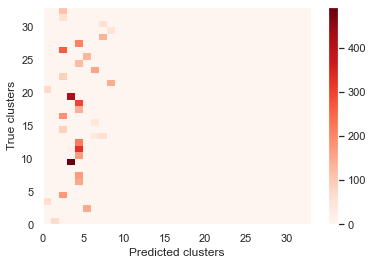

In [11]:
cluster_labels = metadata.ClusterID_Ecker.values
y_true = cluster_labels
y_pred = best_clusters
conf_m = confusion_matrix(y_true, y_pred)
plt.pcolormesh(conf_m, cmap = plt.cm.Reds)
plt.colorbar()
plt.xlabel("Predicted clusters")
plt.ylabel("True clusters")

In [48]:
conf_m[0:10]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  2,  2,
         1,  8,  0,  0,  0,  0,  0,  0,  0,  2,  0, 13, 14,  4, 10,  1,
         4,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 43,  2, 36, 16, 65, 15, 35, 18, 59, 53,  6, 52, 31,
        41, 37,  0,  0,  0,  1,  0,  0,  0,  1,  0, 11,  1,  1,  3,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20, 37, 38,  0,  1,  1,  1, 38, 48, 14, 11, 58, 22,
        18, 47, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  5,  8,  1, 10,  1,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0

## Clustered heatmaps

In [12]:
# make dataframe of layer_clusters from tree_sne
layer_clusters_df = pd.DataFrame(layer_clusters)

/home/AD/ejp002/.local/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


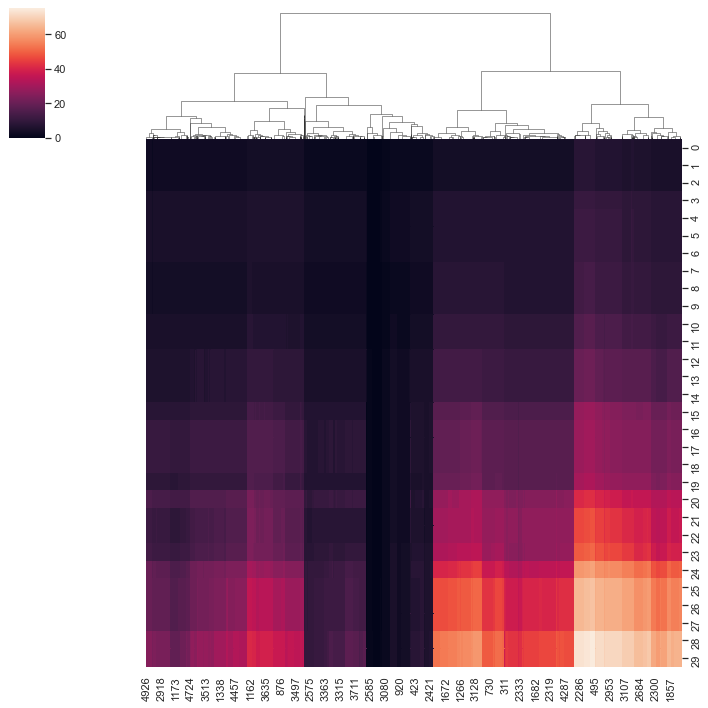

In [13]:
g = sns.clustermap(layer_clusters_df, row_cluster=False)

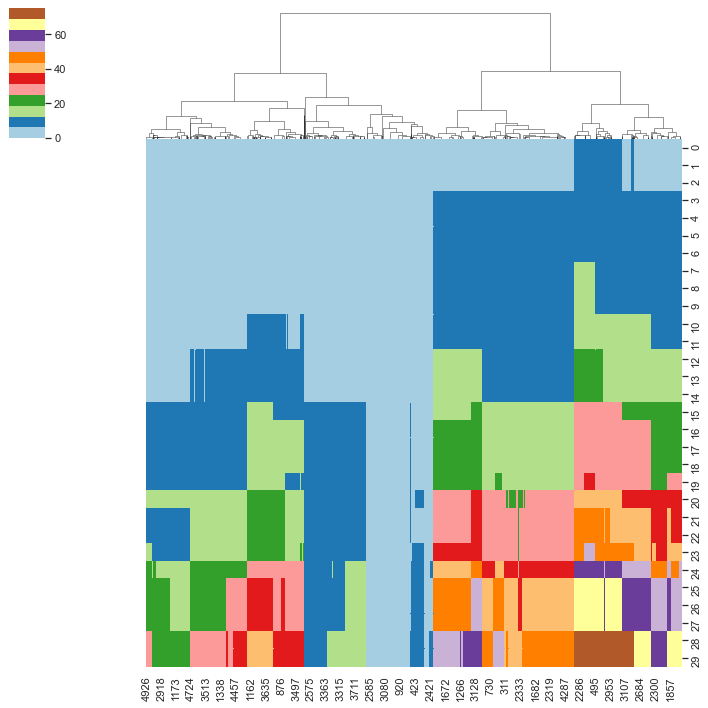

In [14]:
# different color
g = sns.clustermap(layer_clusters_df, row_cluster=False, cmap="Paired")

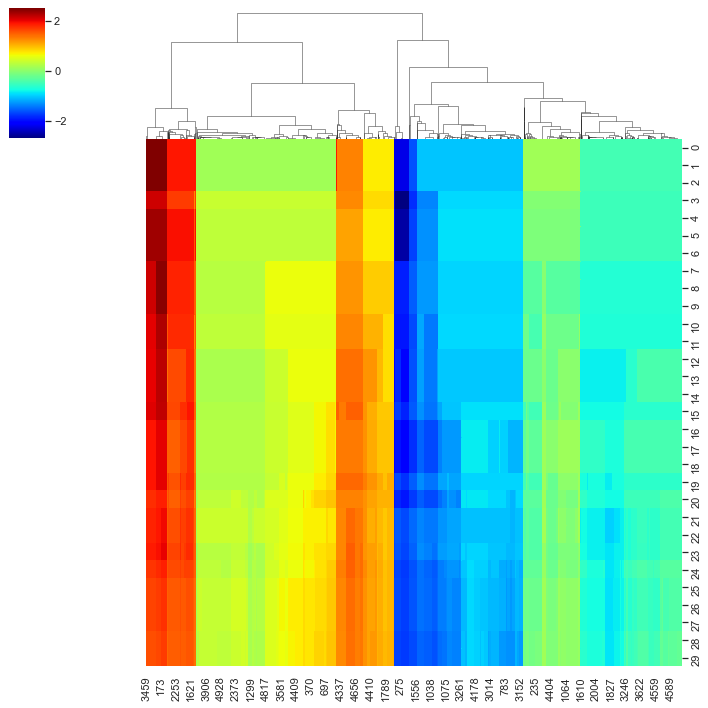

In [15]:
#Normalize data within the rows
g = sns.clustermap(layer_clusters_df, row_cluster=False, z_score=0, cmap="jet")

## Adjusted Rand Score

In [16]:
ari = []
for i in layer_clusters:
    ari.append(adjusted_rand_score(cluster_labels, i))

In [51]:
layer_clusters

array([[ 3,  4,  4, ...,  2,  3,  3],
       [ 3,  4,  4, ...,  2,  3,  3],
       [ 3,  4,  4, ...,  2,  3,  3],
       ...,
       [25, 47, 42, ..., 12, 19, 26],
       [31, 54, 47, ..., 14, 22, 33],
       [31, 54, 47, ..., 14, 22, 33]])

Text(0, 0.5, 'ARI')

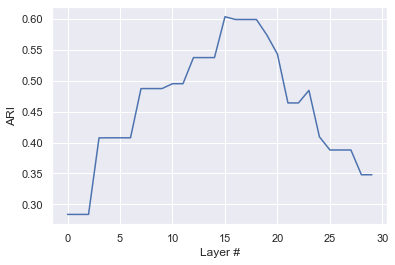

In [17]:
plt.plot(ari)
plt.xlabel('Layer #')
plt.ylabel('ARI')

In [55]:
best_clusters.shape

(4936,)

In [57]:
best_clusters.max()

8

In [58]:
layer_clusters.max()

75

In [59]:
cluster_labels.max()

33

## Match index with cell_id from metadata

In [18]:
matching_id = ['snmcseq_gene_' + i for i in metadata._id]

In [19]:
metadata['matching_id'] = ['snmcseq_gene_'+i for i in metadata._id]

In [20]:
metadata = metadata.set_index('matching_id', drop=False)

In [21]:
metadata

,CellID,Category_Ecker,ClusterID_Ecker,ClusterLabel_Ecker,Genome_Coverage,Reads_Filtered,Reads_Mapped,Reads_Nonclonal,Reads_Total,Valid_Glia,...,Estimated mCG/CG,Estimated mCH/CH,% Genome covered,region,replicate,ALLC_path,v2_id,major_clusters,sub_cluster,matching_id
matching_id,,,,,,,,,,,,,,,,,,,,,
snmcseq_gene_3C_M_0,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_...,Neuron,9,L2/3,0.0492,1195574,1812485,1475086,2896392,0,...,0.75774,0.01818,4.92,3C,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_0,L2-3,L2-3_4_LowQual,snmcseq_gene_3C_M_0
snmcseq_gene_3C_M_1,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_...,Neuron,6,L5a,0.0558,1355517,2086717,1685218,3306366,0,...,0.77695,0.02830,5.58,3C,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_1,L5a,L5a_1,snmcseq_gene_3C_M_1
snmcseq_gene_3C_M_2,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_...,Neuron,11,L4,0.0665,1631274,2517605,2032935,3972894,0,...,0.75080,0.01481,6.65,3C,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_2,L4,L4_2,snmcseq_gene_3C_M_2
snmcseq_gene_3C_M_3,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_...,Neuron,19,L2/3,0.0602,1479211,2359076,1903348,3772120,0,...,0.75336,0.01743,6.02,3C,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_3,L2-3,L2-3_1,snmcseq_gene_3C_M_3
snmcseq_gene_3C_M_4,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_...,Neuron,11,L4,0.0528,1293662,2063268,1671265,3314196,0,...,0.76515,0.01461,5.28,3C,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_4,L4,L4_2,snmcseq_gene_3C_M_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snmcseq_gene_4B_M_806,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CE...,Neuron,26,L6,0.0510,1211041,1727025,1456794,2732458,0,...,0.77585,0.01364,5.10,4B,4B_M_180104,/gale/raidix/rdx-4/CEMBA_RS1/4B/CEMBA180104_4B...,4B_806,L6a,L6a_0,snmcseq_gene_4B_M_806
snmcseq_gene_4B_M_894,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CE...,Neuron,33,L6,0.0475,1128264,1619985,1366651,2454868,0,...,0.79115,0.01910,4.75,4B,4B_M_180104,/gale/raidix/rdx-4/CEMBA_RS1/4B/CEMBA180104_4B...,4B_894,L6a,L6a_5,snmcseq_gene_4B_M_894
snmcseq_gene_4B_M_984,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CE...,Neuron,26,L6,0.0402,955952,1384698,1176697,2118838,0,...,0.78281,0.01492,4.02,4B,4B_M_180104,/gale/raidix/rdx-4/CEMBA_RS1/4B/CEMBA180104_4B...,4B_984,L6a,L6a_2_LowQual,snmcseq_gene_4B_M_984


In [22]:
new_df = pd.read_csv('/cndd/fangming/CEMBA/data/MOp_all/data_freeze/supp_info/clusters_final/cell_cluster_assignment_all_integrations.tsv', sep='\t')

/cndd2/ethan/conda_envs/treesne/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,2,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [23]:
d = [new_df["cell_id"],new_df["SCF_round2"], new_df["SCF_round3"], new_df["LIGER_level1"], new_df["LIGER_level2"]]
headers = ["cell_id", "SCF_round2", "SCF_round3", "LIGER_level1", "LIGER_level2"]
all_cell_df = pd.concat(d, axis=1, keys = headers)

In [24]:
all_cell_df = all_cell_df.set_index('cell_id')

In [25]:
all_cell_df

,SCF_round2,SCF_round3,LIGER_level1,LIGER_level2
cell_id,,,,
snmcseq_gene_2C_M_0,1-1,1-1-1,0,it_8
snmcseq_gene_2C_M_1,4-2,4-2-1,1,it_0
snmcseq_gene_2C_M_100,4-1,4-1-1,1,it_0
snmcseq_gene_2C_M_1000,4-2,4-2-1,1,it_0
snmcseq_gene_2C_M_1001,4-1,4-1-1,1,it_0
...,...,...,...,...
snatac_gene_CEMBA180618_5D_TCCGGAGAAACCAGGTGTACTGACTTGGAAGT,NaN,NaN,glia,non_neuron_10
snatac_gene_CEMBA180618_5D_TCCGGAGAACGTTCGAGGTTGCGTAACGAACG,NaN,NaN,glia,non_neuron_10
snatac_gene_CEMBA180618_5D_TCCGGAGAACGTTCGAGTACTGACTCCGGTAA,NaN,NaN,glia,non_neuron_10


In [26]:
metadata = metadata.join(all_cell_df)

In [27]:
metadata

,CellID,Category_Ecker,ClusterID_Ecker,ClusterLabel_Ecker,Genome_Coverage,Reads_Filtered,Reads_Mapped,Reads_Nonclonal,Reads_Total,Valid_Glia,...,replicate,ALLC_path,v2_id,major_clusters,sub_cluster,matching_id,SCF_round2,SCF_round3,LIGER_level1,LIGER_level2
matching_id,,,,,,,,,,,,,,,,,,,,,
snmcseq_gene_3C_M_0,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_...,Neuron,9,L2/3,0.0492,1195574,1812485,1475086,2896392,0,...,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_0,L2-3,L2-3_4_LowQual,snmcseq_gene_3C_M_0,4-2,4-2-2,1,it_0
snmcseq_gene_3C_M_1,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_...,Neuron,6,L5a,0.0558,1355517,2086717,1685218,3306366,0,...,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_1,L5a,L5a_1,snmcseq_gene_3C_M_1,3-2,3-2-1,17,it_3
snmcseq_gene_3C_M_2,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_...,Neuron,11,L4,0.0665,1631274,2517605,2032935,3972894,0,...,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_2,L4,L4_2,snmcseq_gene_3C_M_2,1-1,1-1-1,19,it_8
snmcseq_gene_3C_M_3,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_...,Neuron,19,L2/3,0.0602,1479211,2359076,1903348,3772120,0,...,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_3,L2-3,L2-3_1,snmcseq_gene_3C_M_3,4-2,4-2-1,1,it_5
snmcseq_gene_3C_M_4,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_...,Neuron,11,L4,0.0528,1293662,2063268,1671265,3314196,0,...,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_4,L4,L4_2,snmcseq_gene_3C_M_4,1-1,1-1-1,19,it_8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snmcseq_gene_4B_M_806,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CE...,Neuron,26,L6,0.0510,1211041,1727025,1456794,2732458,0,...,4B_M_180104,/gale/raidix/rdx-4/CEMBA_RS1/4B/CEMBA180104_4B...,4B_806,L6a,L6a_0,snmcseq_gene_4B_M_806,2-1,2-1-1,2,non_it_0
snmcseq_gene_4B_M_894,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CE...,Neuron,33,L6,0.0475,1128264,1619985,1366651,2454868,0,...,4B_M_180104,/gale/raidix/rdx-4/CEMBA_RS1/4B/CEMBA180104_4B...,4B_894,L6a,L6a_5,snmcseq_gene_4B_M_894,2-2,2-2-1,2,non_it_0
snmcseq_gene_4B_M_984,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CE...,Neuron,26,L6,0.0402,955952,1384698,1176697,2118838,0,...,4B_M_180104,/gale/raidix/rdx-4/CEMBA_RS1/4B/CEMBA180104_4B...,4B_984,L6a,L6a_2_LowQual,snmcseq_gene_4B_M_984,2-1,2-1-1,2,non_it_0


## dataframe of number of clusters for each layer in cell

In [28]:
layer_clusters_df = layer_clusters_df.T
layer_clusters_df = layer_clusters_df.set_index(metadata['matching_id'])

In [29]:
layer_clusters_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
matching_id,,,,,,,,,,,,,,,,,,,,,
snmcseq_gene_3C_M_0,3,3,3,5,5,5,5,4,4,4,...,17,16,16,17,24,25,25,25,31,31
snmcseq_gene_3C_M_1,4,4,4,7,7,7,7,8,8,8,...,28,30,30,32,40,47,47,47,54,54
snmcseq_gene_3C_M_2,4,4,4,7,7,7,7,7,7,7,...,25,27,27,27,35,42,42,42,47,47
snmcseq_gene_3C_M_3,3,3,3,5,5,5,5,4,4,4,...,13,11,11,12,17,18,18,18,22,22
snmcseq_gene_3C_M_4,4,4,4,7,7,7,7,7,7,7,...,25,27,27,27,35,40,40,40,46,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snmcseq_gene_4B_M_806,2,2,2,4,4,4,4,3,3,3,...,11,8,8,9,10,11,11,11,11,11
snmcseq_gene_4B_M_894,2,2,2,4,4,4,4,3,3,3,...,6,5,5,6,6,6,6,6,7,7
snmcseq_gene_4B_M_984,2,2,2,4,4,4,4,3,3,3,...,11,8,8,9,12,12,12,12,14,14


# dataframe with everything

In [30]:
layer_clusters_df = layer_clusters_df.join(metadata)

In [31]:
# Rename columns 1 - 29
layer_clusters_df = layer_clusters_df.rename({0:"Layer 1: # Clusters", 1:"Layer 2: # Clusters", 2:"Layer 3: # Clusters", 3:"Layer 4: # Clusters", 4:"Layer 5: # Clusters", 5:"Layer 6: # Clusters", 6:"Layer 7: # Clusters", 7:"Layer 8: # Clusters", 8:"Layer 9: # Clusters", 9:"Layer 10: # Clusters", 10:"Layer 11: # Clusters", 11:"Layer 12: # Clusters", 12:"Layer 13: # Clusters", 13:"Layer 14: # Clusters", 14:"Layer 15: # Clusters", 15:"Layer 16: # Clusters", 16:"Layer 17: # Clusters", 17:"Layer 18: # Clusters", 18:"Layer 19: # Clusters", 19:"Layer 20: # Clusters", 20:"Layer 21: # Clusters", 19:"Layer 20: # Clusters", 20:"Layer 21: # Clusters", 21:"Layer 22: # Clusters", 22:"Layer 23: # Clusters", 23:"Layer 24: # Clusters", 24:"Layer 25: # Clusters", 25:"Layer 26: # Clusters", 26:"Layer 27: # Clusters", 27:"Layer 28: # Clusters", 28:"Layer 29: # Clusters", 29:"Layer 30: # Clusters"}, axis='columns')

In [32]:
layer_clusters_df

,Layer 1: # Clusters,Layer 2: # Clusters,Layer 3: # Clusters,Layer 4: # Clusters,Layer 5: # Clusters,Layer 6: # Clusters,Layer 7: # Clusters,Layer 8: # Clusters,Layer 9: # Clusters,Layer 10: # Clusters,...,replicate,ALLC_path,v2_id,major_clusters,sub_cluster,matching_id,SCF_round2,SCF_round3,LIGER_level1,LIGER_level2
matching_id,,,,,,,,,,,,,,,,,,,,,
snmcseq_gene_3C_M_0,3,3,3,5,5,5,5,4,4,4,...,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_0,L2-3,L2-3_4_LowQual,snmcseq_gene_3C_M_0,4-2,4-2-2,1,it_0
snmcseq_gene_3C_M_1,4,4,4,7,7,7,7,8,8,8,...,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_1,L5a,L5a_1,snmcseq_gene_3C_M_1,3-2,3-2-1,17,it_3
snmcseq_gene_3C_M_2,4,4,4,7,7,7,7,7,7,7,...,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_2,L4,L4_2,snmcseq_gene_3C_M_2,1-1,1-1-1,19,it_8
snmcseq_gene_3C_M_3,3,3,3,5,5,5,5,4,4,4,...,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_3,L2-3,L2-3_1,snmcseq_gene_3C_M_3,4-2,4-2-1,1,it_5
snmcseq_gene_3C_M_4,4,4,4,7,7,7,7,7,7,7,...,3C_M_171206,/gale/raidix/rdx-4/CEMBA_RS1/3C/CEMBA171206_3C...,3C_4,L4,L4_2,snmcseq_gene_3C_M_4,1-1,1-1-1,19,it_8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snmcseq_gene_4B_M_806,2,2,2,4,4,4,4,3,3,3,...,4B_M_180104,/gale/raidix/rdx-4/CEMBA_RS1/4B/CEMBA180104_4B...,4B_806,L6a,L6a_0,snmcseq_gene_4B_M_806,2-1,2-1-1,2,non_it_0
snmcseq_gene_4B_M_894,2,2,2,4,4,4,4,3,3,3,...,4B_M_180104,/gale/raidix/rdx-4/CEMBA_RS1/4B/CEMBA180104_4B...,4B_894,L6a,L6a_5,snmcseq_gene_4B_M_894,2-2,2-2-1,2,non_it_0
snmcseq_gene_4B_M_984,2,2,2,4,4,4,4,3,3,3,...,4B_M_180104,/gale/raidix/rdx-4/CEMBA_RS1/4B/CEMBA180104_4B...,4B_984,L6a,L6a_2_LowQual,snmcseq_gene_4B_M_984,2-1,2-1-1,2,non_it_0


# confusion matrix of tree_sne and metadata

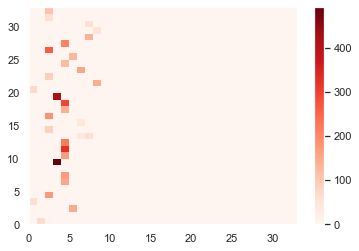

In [33]:
# Confusion matrix comparing metadata clusters with clusters from Layer 1
y_true = metadata['ClusterID_Ecker']
y_pred = layer_clusters_df['Layer 1: # Clusters']
conf_m = confusion_matrix(y_true, y_pred)
plt.pcolormesh(conf_m, cmap = plt.cm.Reds)
plt.colorbar()

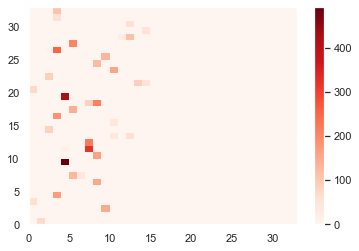

In [34]:
# Confusion matrix comparing metadata clusters with clusters from Layer 10
y_true = metadata['ClusterID_Ecker']
y_pred = layer_clusters_df['Layer 10: # Clusters']
conf_m = confusion_matrix(y_true, y_pred)
plt.pcolormesh(conf_m, cmap = plt.cm.Reds)
plt.colorbar()

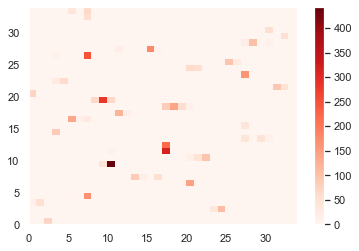

In [35]:
# Confusion matrix comparing metadata clusters with clusters from Layer 20
y_true = metadata['ClusterID_Ecker']
y_pred = layer_clusters_df['Layer 20: # Clusters']
conf_m = confusion_matrix(y_true, y_pred)
plt.pcolormesh(conf_m, cmap = plt.cm.Reds)
plt.colorbar()

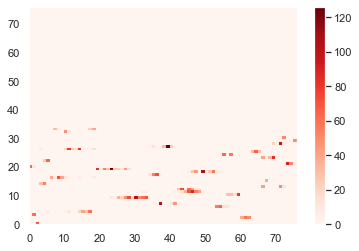

In [36]:
# Confusion matrix comparing metadata clusters with clusters from Layer 30
y_true = metadata['ClusterID_Ecker']
y_pred = layer_clusters_df['Layer 30: # Clusters']
conf_m = confusion_matrix(y_true, y_pred)
plt.pcolormesh(conf_m, cmap = plt.cm.Reds)
plt.colorbar()

# Clean LIGER_level1 column

In [37]:
# Delete rows that contain inf, -inf, or NaN
layer_clusters_df = layer_clusters_df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [38]:
# Change type of column values to match number of layers type
layer_clusters_df['LIGER_level1'].astype(float).astype(int)

matching_id
snmcseq_gene_3C_M_3        1
snmcseq_gene_3C_M_6       19
snmcseq_gene_3C_M_7       10
snmcseq_gene_3C_M_9       10
snmcseq_gene_3C_M_10      15
                          ..
snmcseq_gene_4B_M_629      3
snmcseq_gene_4B_M_1071    19
snmcseq_gene_4B_M_160      1
snmcseq_gene_4B_M_395     10
snmcseq_gene_4B_M_894      2
Name: LIGER_level1, Length: 2848, dtype: int64

# confusion matrix of tree_sne and LIGER_level1

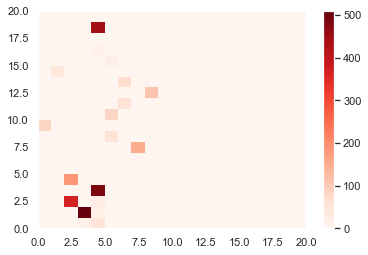

In [39]:
# Confusion matrix comparing LIGER_level1 with clusters from Layer 1
y_true = layer_clusters_df['LIGER_level1']
y_pred = layer_clusters_df['Layer 1: # Clusters']
conf_m = confusion_matrix(y_true, y_pred)
plt.pcolormesh(conf_m, cmap = plt.cm.Reds)
plt.colorbar()

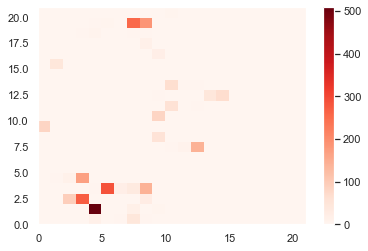

In [40]:
# Confusion matrix comparing LIGER_level1 with clusters from Layer 10
y_true = layer_clusters_df['LIGER_level1']
y_pred = layer_clusters_df['Layer 10: # Clusters']
conf_m = confusion_matrix(y_true, y_pred)
plt.pcolormesh(conf_m, cmap = plt.cm.Reds)
plt.colorbar()

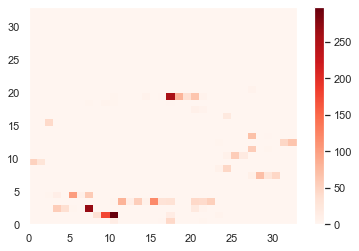

In [41]:
# Confusion matrix comparing LIGER_level1 with clusters from Layer 20
y_true = layer_clusters_df['LIGER_level1']
y_pred = layer_clusters_df['Layer 20: # Clusters']
conf_m = confusion_matrix(y_true, y_pred)
plt.pcolormesh(conf_m, cmap = plt.cm.Reds)
plt.colorbar()

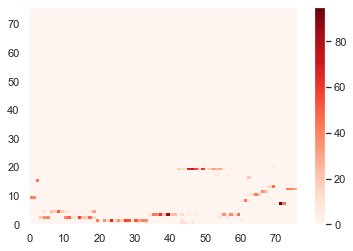

In [42]:
# Confusion matrix comparing LIGER_level1 with clusters from Layer 30
y_true = layer_clusters_df['LIGER_level1']
y_pred = layer_clusters_df['Layer 30: # Clusters']
conf_m = confusion_matrix(y_true, y_pred)
plt.pcolormesh(conf_m, cmap = plt.cm.Reds)
plt.colorbar()

# layer_clusters and cluster_labels plot

In [43]:
con = np.concatenate((layer_clusters, cluster_labels[np.newaxis,:]))

In [44]:
con = con/con.max(axis = 1, keepdims=True)

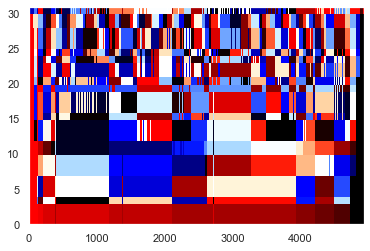

In [45]:
import matplotlib.pyplot as plt

order = np.argsort(layer_clusters[-1,:])
plt.pcolormesh(con[:,order], cmap = plt.cm.flag)